<a href="https://colab.research.google.com/github/ShrudhiChaudhary/PlayStore_Data_Analysis/blob/main/Shrudhi_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Importing the dataset**

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.shape

(10841, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Analyze null values and filter them**

In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data["Rating"].fillna(0, inplace = True)

In [8]:
data["Current Ver"].fillna( method ='ffill', inplace = True)

In [9]:
data["Content Rating"].fillna(0, inplace = True)

In [10]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       3
dtype: int64

In [11]:
data = data.dropna()

In [12]:
data = data.reset_index(drop = True)

In [13]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Data Cleaning / Correction of data types**

In [14]:
print(list(data['Size']))

['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '19M', '29M', '33M', '3.1M', '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M', '14M', '12M', '4.2M', '7.0M', '23M', '6.0M', '25M', '6.1M', '4.6M', '4.2M', '9.2M', '5.2M', '11M', '11M', '4.2M', '9.2M', '24M', 'Varies with device', '11M', '9.4M', '15M', '10M', 'Varies with device', '1.2M', '12M', '24M', '26M', '8.0M', '7.9M', '25M', '56M', '57M', 'Varies with device', '35M', '33M', '33M', '5.6M', '54M', '201k', '3.6M', '5.7M', '17M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', 'Varies with device', 'Varies with device', '7.0M', '35M', '16M', '16M', 'Varies with device', '17M', '3.4M', '8.9M', '3.9M', '2.9M', '38M', '32M', '37M', '15M', '5.4M', '18M', 'Varies with device', '38M', '1.1M', 'Varies with device', 'Varies with device', '7.9M', '35M', 'Varies with device', '17M', '19M', '14M', '2.2M', '4.5M', '17M', '14M', '9.8M', '21M', 'Varies with device', '52M', '14M', '25M', '9.0M', 'Varies with device', '12M', 'Varies with dev

In [15]:
for col in list(data['Size']):
    data[col] = data['Size'].str.replace('M','')
print(data[col])    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


0                        19
1                        14
2                       8.7
3                        25
4                       2.8
                ...        
10832                    53
10833                   3.6
10834                   9.5
10835    Varies with device
10836                    19
Name: 19M, Length: 10837, dtype: object


In [16]:
data['Size'] = data[col]

In [17]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,467k,157k,44k,676k,67k,552k,885k,1020k,582k,619k
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,...,19,19,19,19,19,19,19,19,19,19
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,14,14,14,14,14,14,14,14,14,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,...,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,...,25,25,25,25,25,25,25,25,25,25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8


In [19]:
data.shape

(10837, 474)

In [18]:
data.iloc[:,14:]

,14M,8.7M,25M,2.8M,5.6M,29M,33M,3.1M,28M,12M,...,467k,157k,44k,676k,67k,552k,885k,1020k,582k,619k
0,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
1,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7,...,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7,8.7
3,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
10833,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,...,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6
10834,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,...,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5
10835,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,...,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device,Varies with device


In [20]:
data.drop(data.iloc[:,14:],axis = 1, inplace=True)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,19M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [21]:
data.drop('19M',axis = 1,inplace = True)

In [22]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
data_frame = data[(data['Type']!='Free')]
data_frame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [24]:
data_frame.shape

(799, 13)

In [25]:
print(list(data_frame['Price']))

['$4.99', '$4.99', '$4.99', '$4.99', '$3.99', '$3.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$3.99', '$3.99', '$5.99', '$3.99', '$3.99', '$4.99', '$2.99', '$3.49', '$4.99', '$2.99', '$3.99', '$2.99', '$2.99', '$2.99', '$1.99', '$4.99', '$4.99', '$4.99', '$5.99', '$6.99', '$9.99', '$4.99', '$3.99', '$2.99', '$3.99', '$2.99', '$3.99', '$3.99', '$4.99', '$3.99', '$2.99', '$7.49', '$2.99', '$0.99', '$0.99', '$0.99', '$4.99', '$2.99', '$4.99', '$2.99', '$4.99', '$4.99', '$2.99', '$2.99', '$3.99', '$3.99', '$2.99', '$2.99', '$3.99', '$3.99', '$6.99', '$2.99', '$9.00', '$0.99', '$5.49', '$9.99', '$6.99', '$10.00', '$3.99', '$5.99', '$24.99', '$11.99', '$79.99', '$11.99', '$2.99', '$16.99', '$3.99', '$2.99', '$9.99', '$3.99', '$14.99', '$2.99', '$3.99', '$2.99', '$1.00', '$29.99', '$2.99', '$2.99', '$12.99', '$4.99', '$2.99', '$14.99', '$5.99', '$3.49', '$0.99', '$2.49', '$24.99', '$10.99', '$1.99', '$24.99', '$4.99', '$3.99', '$2.99', '$7.49', '$1.50', '$2.99', '$3.99', '$1.99', '$9.9

In [26]:
for col1 in list(data_frame['Price']):
    data_frame[col1] = data_frame['Price'].str.replace('$','')
print(data_frame[col1])    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


234       4.99
235       4.99
290       4.99
291       4.99
427       3.99
         ...  
10731     0.99
10756     7.99
10778    16.99
10781     1.20
10794     1.04
Name: $1.04, Length: 799, dtype: object


In [27]:
data_frame['Price'] = data_frame[col1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
data_frame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,$1.97,$200.00,$89.99,$2.56,$30.99,$3.61,$394.99,$1.26,$1.20,$1.04
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000+",Paid,4.99,Everyone,Business,...,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000+",Paid,4.99,Everyone,Business,...,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000+",Paid,4.99,Everyone,Business,...,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000+",Paid,4.99,Everyone,Business,...,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99,4.99
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,...,3.99,3.99,3.99,3.99,3.99,3.99,3.99,3.99,3.99,3.99


In [30]:
data.drop(data.iloc[:,13:],axis = 1, inplace=True)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
print(list(data_frame['Installs']))

['100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '10,000+', '1,000+', '50+', '100+', '100+', '100+', '10,000+', '1,000+', '1,000+', '500,000+', '100,000+', '100,000+', '100,000+', '10,000+', '50,000+', '100,000+', '10,000+', '100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '100,000+', '5,000+', '5,000+', '1,000+', '500+', '100,000+', '500,000+', '10,000+', '10,000+', '1,000+', '1,000+', '1,000+', '100+', '100+', '1,000+', '5,000+', '5,000+', '1,000+', '10,000+', '10,000+', '5,000+', '1,000+', '10,000+', '10,000+', '50,000+', '1,000+', '10,000+', '10,000+', '50,000+', '10,000,000+', '1,000,000+', '100,000+', '10,000+', '10,000+', '10,000+', '10,000+', '10,000+', '5,000+', '5,000+', '100,000+', '50,000+', '1,000+', '10,000+', '50,000+', '1,000+', '1,000+', '10,000+', '1,000+', '1,000+', '1,000+', '100+', '5,000+', '5,000+', '500+', '1,000+', '10,000+', '1,000+', '100+', '1,000+', '500+', '5,000+', '1,000+'

In [32]:
for col1 in list(data_frame['Installs']):
    data_frame[col1] = data_frame['Installs'].str.replace('+','')
print(data_frame[col1])   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


234      100,000
235      100,000
290      100,000
291      100,000
427      100,000
          ...   
10731        100
10756      1,000
10778     10,000
10781     10,000
10794         50
Name: 50+, Length: 799, dtype: object


In [33]:
data_frame['Installs'] = data_frame[col1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
data_frame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,"500,000+","50,000+","5,000+",500+,"10,000,000+","1,000,000+",1+,10+,5+,0+
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000",Paid,4.99,Everyone,Business,...,"100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000"
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000",Paid,4.99,Everyone,Business,...,"100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000"
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000",Paid,4.99,Everyone,Business,...,"100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000"
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000",Paid,4.99,Everyone,Business,...,"100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000"
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000",Paid,3.99,Everyone,Communication,...,"100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000","100,000"


In [35]:
data_frame.drop(data_frame.iloc[:,13:],axis = 1, inplace=True)
data_frame.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,"100,000",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,"100,000",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [36]:
data_frame['ind'] = range(1, len(data_frame) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# **Rearranging the data in descending order according to different parameters**

In [37]:
data2 = data_frame.sort_values(['Rating','Installs','Price'], ascending=[False,False,True])

In [38]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ind
2271,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up,92
5261,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,31,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,336
5964,BC MVA Fines,BOOKS_AND_REFERENCE,5.0,5,7.2,50,Paid,1.75,Everyone,Books & Reference,"October 8, 2015",1.0,4.1 and up,407
9054,Santa's Monster Shootout DX,GAME,5.0,4,33,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,678
4452,P-Home for KLWP,PERSONALIZATION,5.0,4,12,100,Paid,0.99,Everyone,Personalization,"May 15, 2018",v2018.May.15.14,5.0 and up,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,EP Cook Book,MEDICAL,0.0,0,3.2,0,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,731
9334,EG | Explore Folegandros,TRAVEL_AND_LOCAL,0.0,0,56,0,Paid,3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,701
9902,Eu sou Rico,FINANCE,0.0,0,2.6,0,Paid,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up,739
9914,Eu Sou Rico,FINANCE,0.0,0,1.4,0,Paid,394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up,741


# **Which is the highest rated app on Play Store and of which category?****

In [38]:
import matplotlib.pyplot as plt

In [58]:
high_rate = data_frame[(data_frame['Rating']>=4.5)]
high_rate[['App','Category','Rating']]

,App,Category,Rating
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8
851,Sago Mini Hat Maker,EDUCATION,4.9
...,...,...,...
10527,Kernel Manager for Franco Kernel ✨,TOOLS,4.8
10566,FL SW Fishing Regulations,SPORTS,4.6
10675,Solitaire+,GAME,4.6
10686,FO Bixby,PERSONALIZATION,5.0


# **All the apps with rating = 5**

In [ ]:
high_rate1 = data[(data['Rating'] == 5)]
high_rate1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37,"1,000",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,"1,000",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70,100,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10717,Mad Dash Fo' Cash,GAME,5.0,14,16,100,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10738,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,"1,000",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10772,Monster Ride Pro,GAME,5.0,1,24,10,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10816,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,"1,000",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


# **All the apps with rating = 5 and free of cost**

In [ ]:
high_rate2 = high_rate1[(high_rate1 ['Type'] == 'Free')]
high_rate2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37,"1,000",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,"1,000",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70,100,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10717,Mad Dash Fo' Cash,GAME,5.0,14,16,100,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10738,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,"1,000",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10772,Monster Ride Pro,GAME,5.0,1,24,10,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10816,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,"1,000",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


In [65]:
import matplotlib.pyplot as plt
import plotly.express as px

In [66]:
x = data2['Installs'].head(35)
y = data2['App'].head(35)

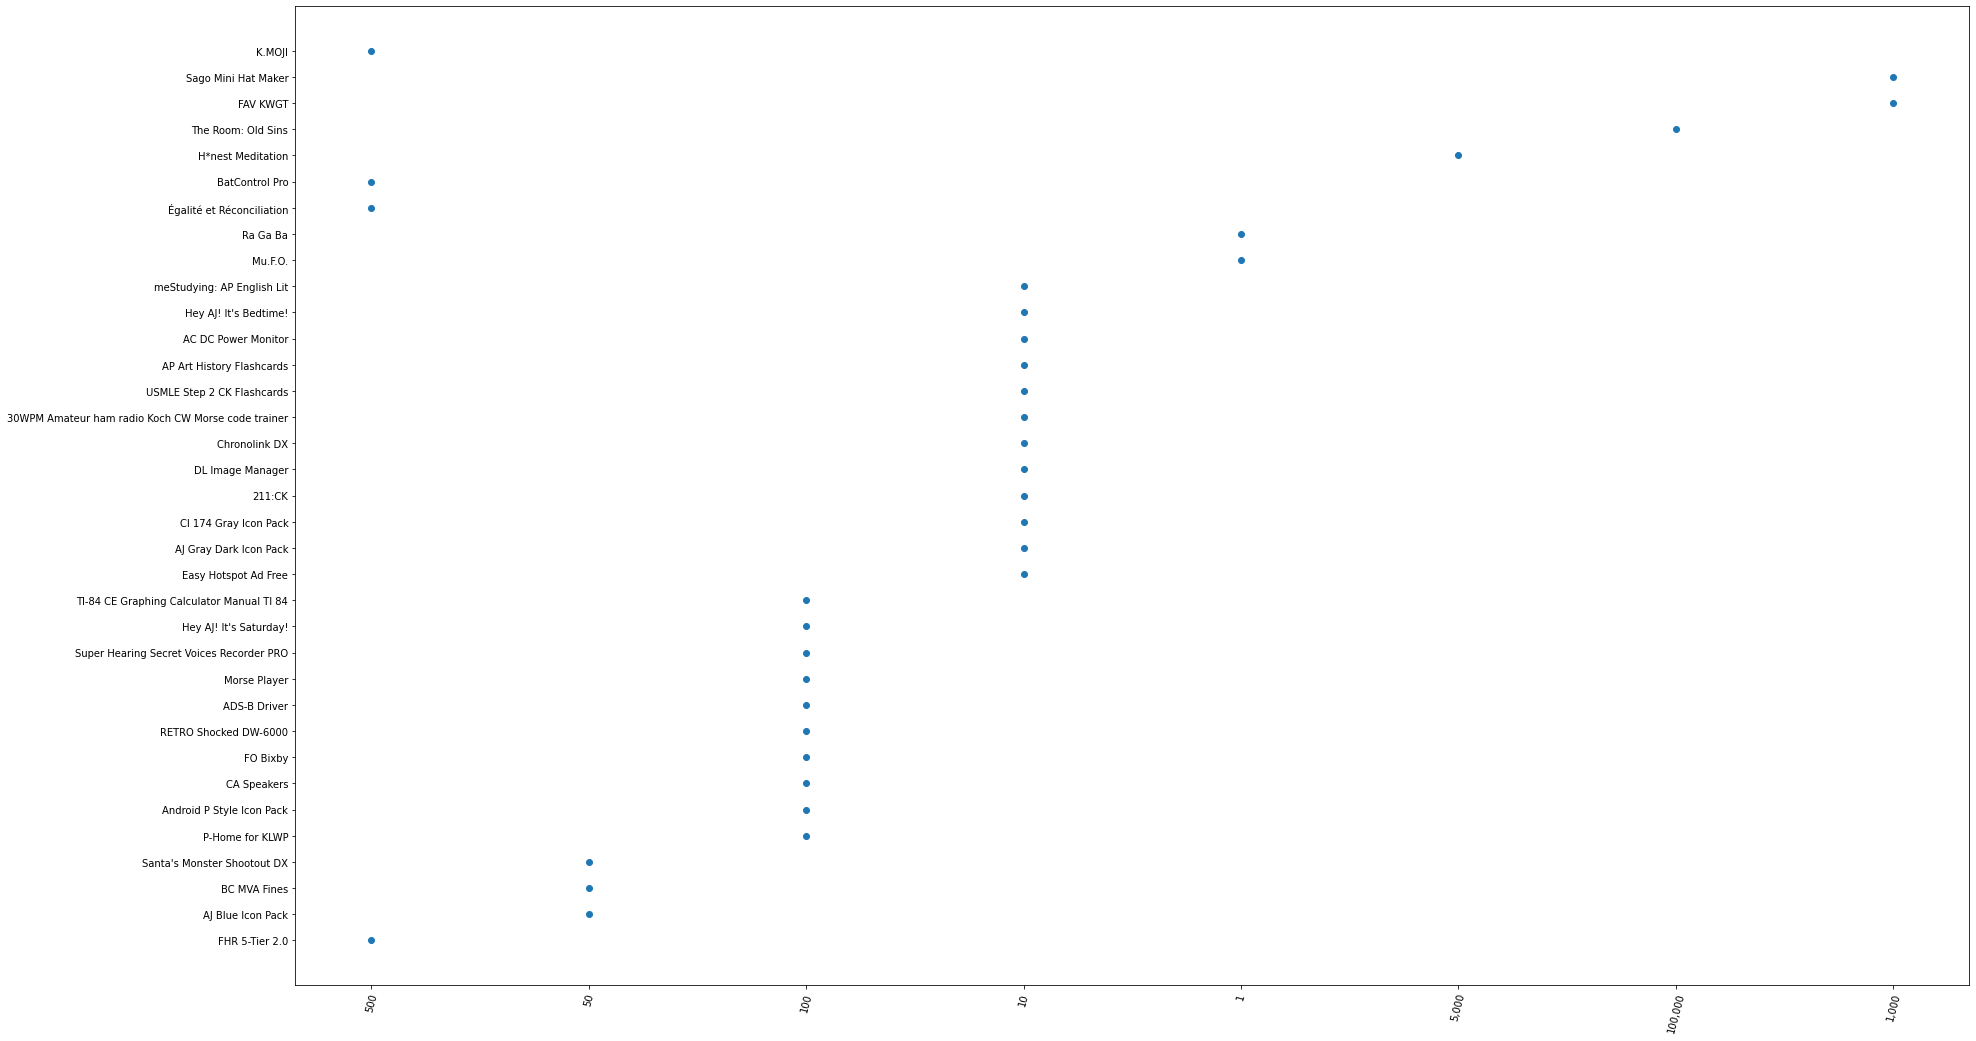

In [72]:
#fig = px.dot(data_frame, x,y, title='Playstore Analysis')
plt.scatter(x,y)
plt.rcParams['figure.figsize'] = (30,18)
plt.xticks(rotation = 75)
plt.show()

# **Frequency of the different Ratings **

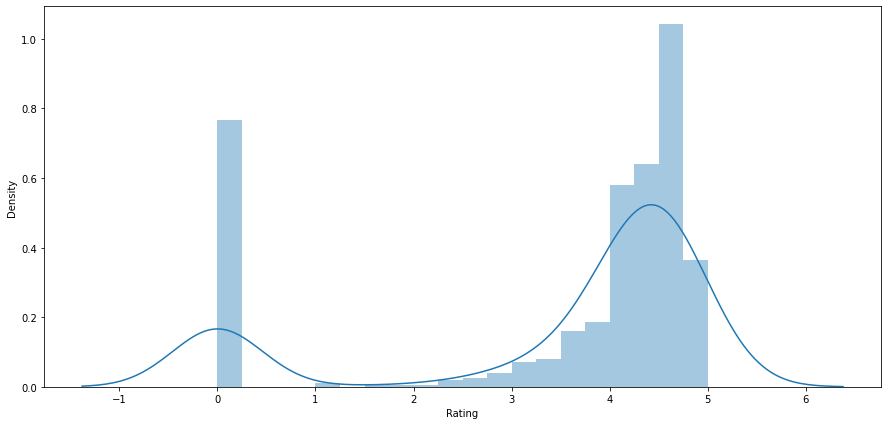

In [121]:
sns.distplot(data2['Rating'])

In [39]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ind
2271,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up,92
5261,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,31,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,336
5964,BC MVA Fines,BOOKS_AND_REFERENCE,5.0,5,7.2,50,Paid,1.75,Everyone,Books & Reference,"October 8, 2015",1.0,4.1 and up,407
9054,Santa's Monster Shootout DX,GAME,5.0,4,33,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,678
4452,P-Home for KLWP,PERSONALIZATION,5.0,4,12,100,Paid,0.99,Everyone,Personalization,"May 15, 2018",v2018.May.15.14,5.0 and up,238


# **Analyzing the price distribution according to the installs and ratings**

In [40]:
x1 = data2['Installs'].head(35)
y2 = data2['Price'].head(35)

In [41]:
s1 = list(data2['Price'])
s1

['2.99',
 '0.99',
 '1.75',
 '1.99',
 '0.99',
 '0.99',
 '0.99',
 '0.99',
 '1.49',
 '1.99',
 '1.99',
 '2.99',
 '3.99',
 '4.99',
 '0.99',
 '0.99',
 '0.99',
 '0.99',
 '0.99',
 '0.99',
 '1.49',
 '19.99',
 '29.99',
 '3.04',
 '4.99',
 '4.99',
 '0.99',
 '1.49',
 '2.99',
 '3.99',
 '1.99',
 '4.99',
 '0.99',
 '3.99',
 '1.99',
 '0.99',
 '0.99',
 '1.49',
 '2.99',
 '3.49',
 '4.49',
 '4.49',
 '4.99',
 '4.99',
 '4.99',
 '4.99',
 '0.99',
 '1.49',
 '1.49',
 '1.49',
 '2.49',
 '3.99',
 '6.99',
 '0.99',
 '1.49',
 '1.99',
 '1.99',
 '2.49',
 '2.50',
 '6.99',
 '6.99',
 '14.99',
 '0.99',
 '1.49',
 '1.99',
 '10.00',
 '19.99',
 '19.99',
 '2.49',
 '2.99',
 '3.49',
 '3.99',
 '9.99',
 '2.99',
 '3.99',
 '3.99',
 '15.99',
 '2.49',
 '2.99',
 '2.99',
 '2.99',
 '4.99',
 '4.99',
 '0.99',
 '1.99',
 '3.99',
 '1.99',
 '2.49',
 '2.99',
 '2.99',
 '2.99',
 '2.99',
 '3.99',
 '3.99',
 '3.99',
 '4.99',
 '4.99',
 '4.99',
 '0.99',
 '0.99',
 '1.99',
 '9.99',
 '1.99',
 '14.99',
 '14.99',
 '2.59',
 '2.99',
 '2.99',
 '2.99',
 '3.90',
 

In [42]:
prices = pd.to_numeric(s1)

In [43]:
prices_numeric = pd.Series(prices)

In [44]:
data2['prices_numeric'] = prices_numeric

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, 'Installs')

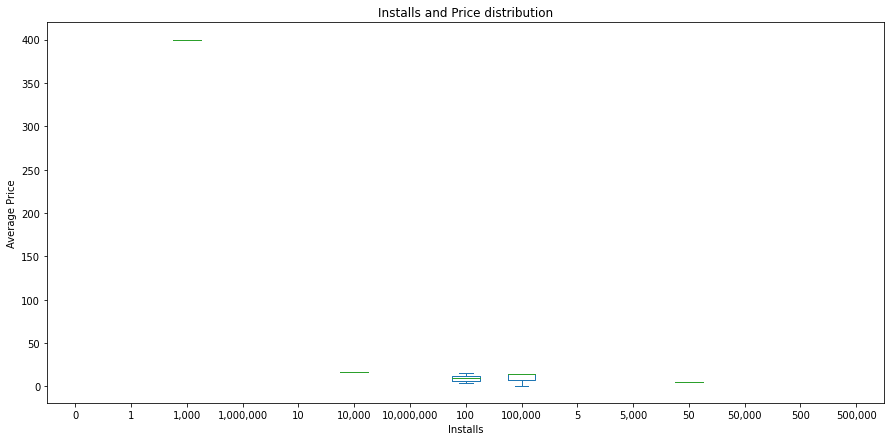

In [108]:
data2.groupby(['Rating', 'Installs'])['prices_numeric'].mean().unstack().plot(kind="box")
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Installs and Price distribution')
plt.ylabel('Average Price')
plt.xlabel('Installs')

# **Frequency of different Genres**

In [115]:
z = data2['Genres']

Text(0.5, 1.0, 'Frequency of the different Genres ')

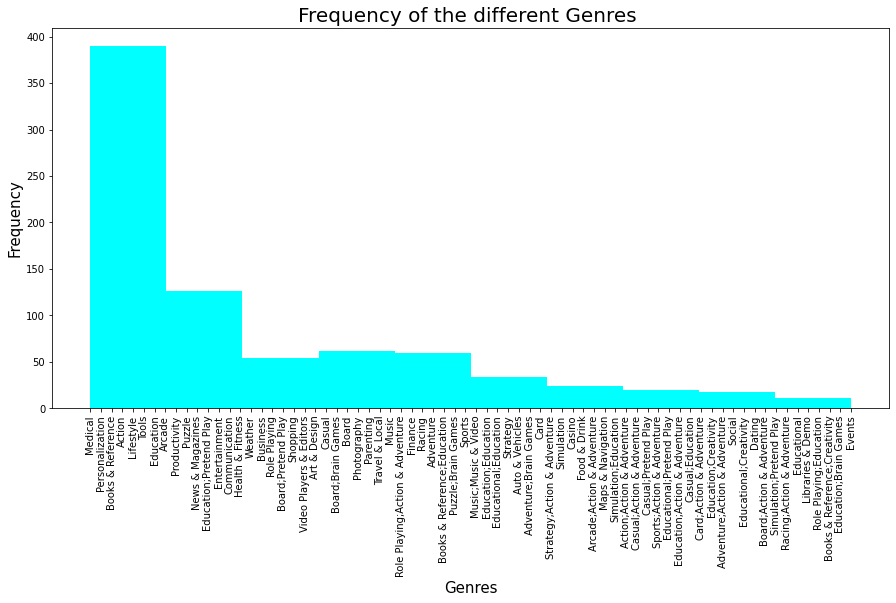

In [124]:
plt.hist(z.values, color='cyan')
plt.figsize = (150,40)
plt.xlabel('Genres',size = 15)
plt.xticks(rotation = 90)
plt.ylabel('Frequency',size = 15)
plt.title('Frequency of the different Genres ',size = 20)

# **Installation of Apps with respect to their ratings **

In [ ]:
x1 = data2['Installs'].head(35)
y2 = data2['Price'].head(35)

In [156]:
analysis = data2.groupby(['Rating','Installs'])['Rating'].count().unstack().head(35)

In [157]:
analysis

Installs,0,1,"1,000","1,000,000",10,"10,000","10,000,000",100,"100,000",5,"5,000",50,"50,000",500,"500,000"
Rating,,,,,,,,,,,,,,,
0.0,10.0,19.0,7.0,NaN,52.0,NaN,NaN,29.0,NaN,12.0,NaN,20.0,NaN,4.0,NaN
1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.8,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2.4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.6,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
data2.groupby(['Rating','Installs'])['Rating'].count().head(35)

Rating  Installs
0.0     0           10
        1           19
        1,000        7
        10          52
        100         29
        5           12
        50          20
        500          4
1.0     10           1
        50           1
1.7     100          1
1.8     1,000        1
2.0     100          1
2.3     1,000        1
        5,000        1
2.4     1,000        1
        100          1
2.5     1,000        1
2.6     1,000        2
2.7     5,000        2
2.8     10,000       1
        5,000        1
        50           1
2.9     1,000        2
        100          1
        5,000        1
        500          1
3.0     1,000        2
        10           1
        100          1
        5,000        1
        50           1
        500          2
3.1     1,000        3
        500          1
Name: Rating, dtype: int64

In [153]:
analysis.columns

Index(['0', '1', '10', '100', '100805', '1013', '10249', '1026', '10295',
       '1034',
       ...
       '93', '936', '9394', '94', '96', '963', '9659', '9699', '97', '97890'],
      dtype='object', name='Reviews', length=422)

In [159]:
analysis

Installs,0,1,"1,000","1,000,000",10,"10,000","10,000,000",100,"100,000",5,"5,000",50,"50,000",500,"500,000"
Rating,,,,,,,,,,,,,,,
0.0,10.0,19.0,7.0,NaN,52.0,NaN,NaN,29.0,NaN,12.0,NaN,20.0,NaN,4.0,NaN
1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.8,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2.4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.6,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


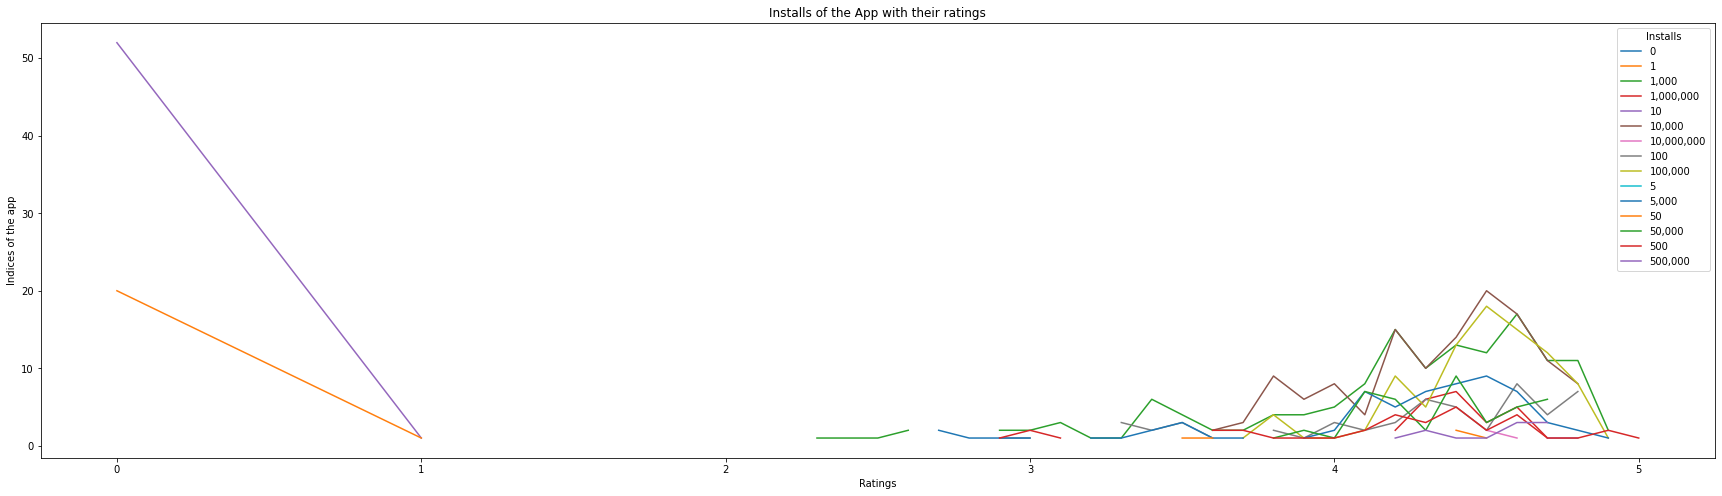

In [160]:
analysis.plot()

plt.title('Installs of the App with their ratings')
plt.ylabel('Indices of the app')
plt.xlabel('Ratings')
plt.rcParams['figure.figsize'] = (30, 8)

In [45]:
import seaborn as sns

In [46]:
import matplotlib.pyplot as plt

In [47]:
#update = data2["App"].count().unstack().head(30)
update = data2.groupby(['App']).count().unstack().head(35)

In [48]:
update.sort_index(inplace=True)

In [49]:
upd = data2.groupby('Last Updated').Size.count().head(35)

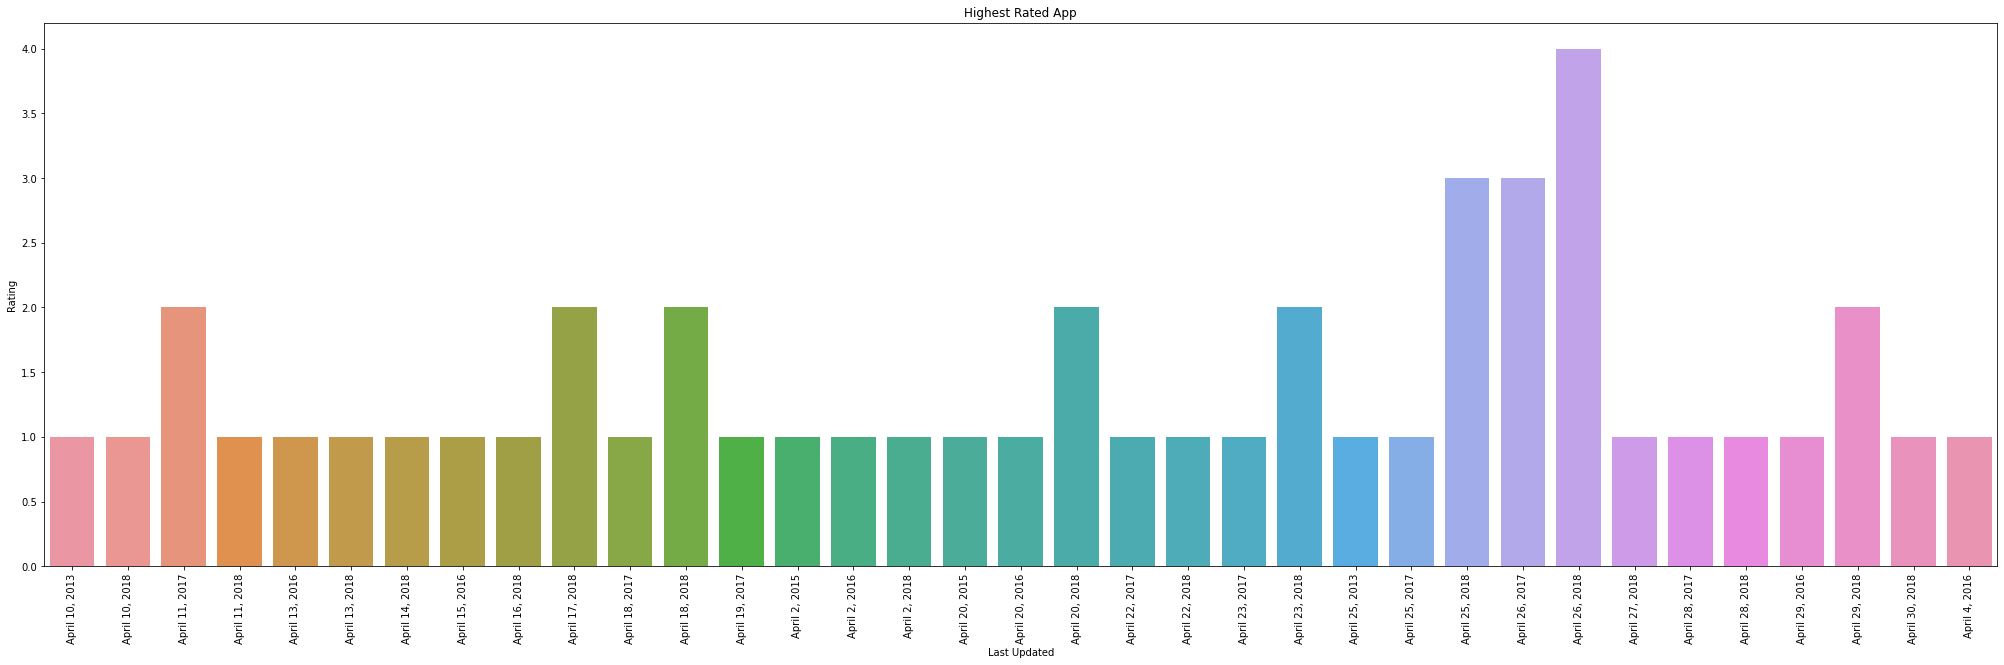

In [53]:
plt.figure(figsize=(35,10))
plt.xticks(rotation=90)
plt.title('Highest Rated App')
upd_plot = sns.barplot(x = upd.index, y = upd)
upd_plot.set(xlabel = 'Last Updated', ylabel = 'Rating');

# **Highest Paid app and their indices**

In [ ]:
convert_dict = {'Price': int}
 
dat = data['Price'].astype('int64')
print(dat.dtypes)

In [ ]:
pd.to_numeric('Price', downcast='integer')

In [ ]:
#Highest Paid App
paid_app = data[data.Type != 'Free'].sort_values('Price', ascending = False)
paid_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ind
2401,Diabetes & Diet Tracker,MEDICAL,4.6,395,19,"1,000",Paid,9.99,Everyone,Medical,"July 16, 2018",6.5.1,5.0 and up,2402
5473,500 AP World History Questions,FAMILY,4.7,7,1.2,100,Paid,9.99,Everyone,Education,"November 1, 2013",1.2,1.6 and up,5474
6178,Baldur's Gate: Enhanced Edition,FAMILY,4.5,20101,7.8,"100,000",Paid,9.99,Teen,Role Playing,"October 2, 2015",1.3,3.0 and up,6179
7796,Jeppesen CR Flight Computer,MAPS_AND_NAVIGATION,3.3,3,26,100,Paid,9.99,Everyone,Maps & Navigation,"October 5, 2016",1.0.8,4.4 and up,7797
7891,Abdominal CT Sectional Walker,MEDICAL,0.0,2,23,100,Paid,9.99,Everyone,Medical,"July 8, 2016",1.1,4.0 and up,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,BringGo AU & NZ,MAPS_AND_NAVIGATION,2.8,440,23,"10,000",Paid,0.99,Everyone,Maps & Navigation,"May 10, 2018",2.5.9,2.3.3 and up,5659
5555,Nightenfell: Shared AR,GAME,4.5,20,65,"1,000",Paid,0.99,Everyone 10+,Action,"March 27, 2018",1.0.0,7.0 and up,5556
5478,Glanceable Ap Watch Face,PERSONALIZATION,0.0,0,11,5,Paid,0.99,Everyone,Personalization,"August 14, 2016",1.0.103,4.4 and up,5479
7382,All-night drugstore CI & Price,HEALTH_AND_FITNESS,0.0,0,5.1,10,Paid,0.99,Everyone,Health & Fitness,"November 27, 2017",3.0.2.0,1.6 and up,7383


In [ ]:
up = paid_app.groupby('ind').Size.count()

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
up

ind
235      1
236      1
291      1
292      1
428      1
        ..
10732    1
10757    1
10779    1
10782    1
10795    1
Name: Size, Length: 799, dtype: int64

TypeError: ignored

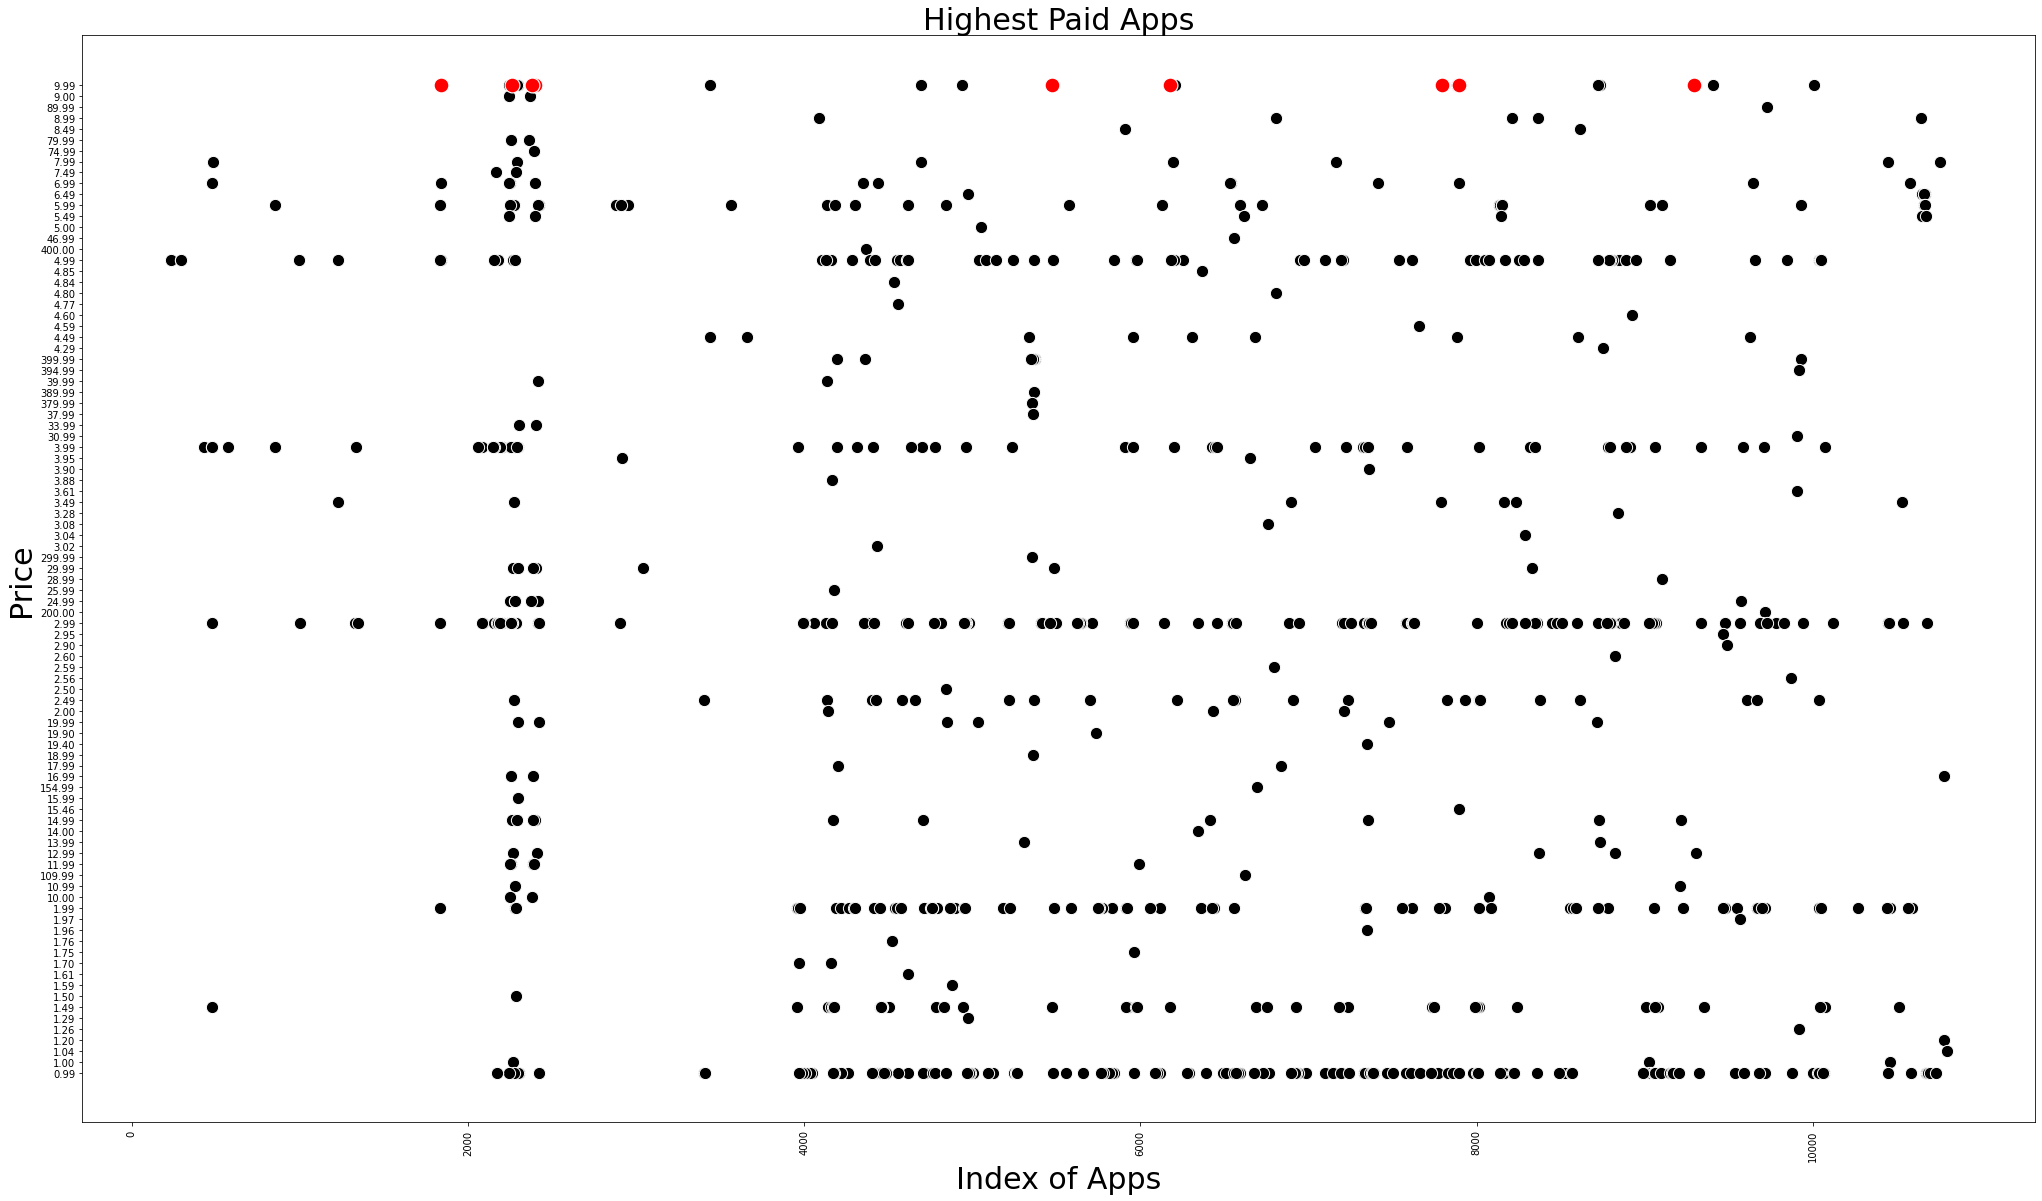

In [ ]:
plt.figure(figsize=(35, 20))
plt.xticks(rotation=90)
plt.xlabel('Index of Apps',size=30)
plt.ylabel('Price',size=30)
plt.title('Highest Paid Apps', size = 30)
sns.scatterplot(x = 'ind',y =  'Price', data = paid_app, s =150, color = 'black');
sns.scatterplot(x = 'ind',y =  'Price', data = paid_app.head(10), s =220, color = 'red');
for i in range(paid_app.head(10).shape[0]):
    plt.annotate(paid_app.ind.tolist()[i], (paid_app.Price.tolist()[i]+0.1, paid_app.App.tolist()[i]) , size = 20)
    plt.show()

# **Loading Data Set 2**

In [1]:
import pandas as pd

In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/User Reviews.csv")

In [ ]:
data_1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
data_1.shape

(64295, 5)

# **Analysing null values**

In [ ]:
data_1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
data_1 = data_1.dropna()

In [ ]:
data_1 = data_1.reset_index(drop = True)

In [ ]:
data_1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
data_1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
data_1.shape

(37427, 6)

# **Data Sorting**

In [ ]:
review_score = data_1['Sentiment'].value_counts()

In [ ]:
data_1['Sentiment_Polarity'].value_counts()

 0.000000    5158
 0.500000    1524
 0.700000     991
 1.000000     959
 0.800000     639
             ... 
-0.072024       1
 0.452000       1
 0.076190       1
-0.067256       1
 0.173333       1
Name: Sentiment_Polarity, Length: 5410, dtype: int64

In [ ]:
data_1.groupby(["Sentiment", "Sentiment_Polarity"])["Translated_Review"].count()

Sentiment  Sentiment_Polarity
Negative   -1.000000             234
           -0.988281               2
           -0.976562               1
           -0.955000               1
           -0.937500               5
                                ... 
Positive    0.975000               1
            0.976562              24
            0.988281               2
            0.992188               2
            1.000000             959
Name: Translated_Review, Length: 5410, dtype: int64

**Adding an extra column so as to denote it as index**

In [ ]:
data_1['row_id'] = range(1, len(data_1) + 1)

In [ ]:
reviews_content_sentiment = pd.DataFrame(data_1, columns=['content','sentiment','reviews_score'])

In [ ]:
reviews_content_sentiment

In [ ]:
reviews_content_sentiment['sentiment'].value_counts()

Series([], Name: sentiment, dtype: int64)

# **Plotting the Sentiment analysis and it's polarity**

In [ ]:
d1 = list(data_1['Sentiment'])
d2 = list(data_1['Sentiment_Polarity'])

<BarContainer object of 37427 artists>

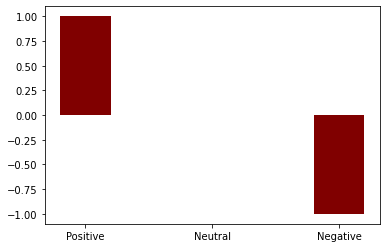

In [ ]:
plt.bar(d1, d2, color ='maroon', width = 0.4)

In [ ]:
import matplotlib.pyplot as plt

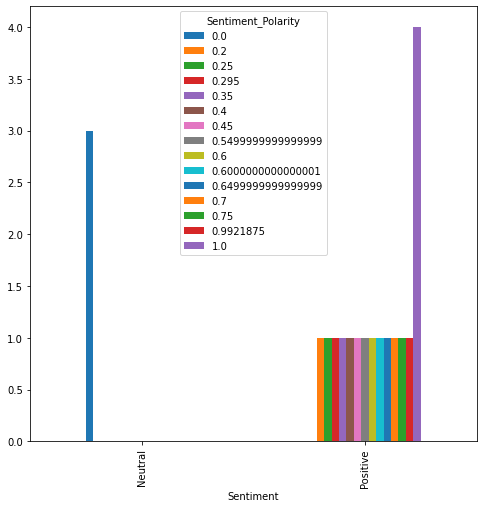

In [ ]:
pd.crosstab(data_1['Sentiment'],data_1['Sentiment_Polarity'].head(20)).plot.bar(figsize=(8,8))

# **Data conversion**

In [ ]:
data_factorized = data_1.copy()

In [ ]:
data_factorized.Sentiment = pd.factorize(data_factorized.Sentiment)[0]

In [ ]:
data_factorized['Sentiment_Polarity'] = data_factorized['Sentiment_Polarity'].astype(float)

In [ ]:
data_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  int64  
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
 5   row_id                  37427 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
data_factorized.groupby(["Sentiment", "Sentiment_Polarity"])["Translated_Review"].count()

Sentiment  Sentiment_Polarity
0           0.0                  23039
            1.0                    959
1           0.0                   5158
2          -1.0                    234
            0.0                   8037
Name: Translated_Review, dtype: int64

# **Statistical Analysis by Sentiment and Sentiment Polarity**

In [ ]:
import seaborn as sns

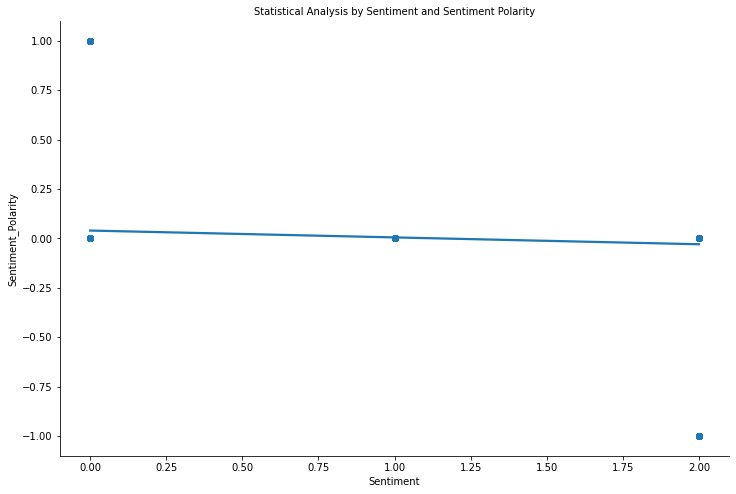

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment and Sentiment Polarity', fontsize=10)
sns.regplot(x='Sentiment', y= 'Sentiment_Polarity', data=data_factorized)
sns.despine()

In [ ]:
pd.crosstab(data_1['Sentiment'],data_1['score']).plot.bar(figsize=(20,10))

In [ ]:
tr = list(data_1['Translated_Review'])

In [ ]:
tr

# **Testing the model**

In [ ]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output

In [ ]:
data_1 = data_1[['Translated_Review','Sentiment']]

In [ ]:
train, test = train_test_split(data_1,test_size = 0.1)
train = train[train.Sentiment != "Neutral"]

# **Aanalysis using Word Cloud**

Positive words


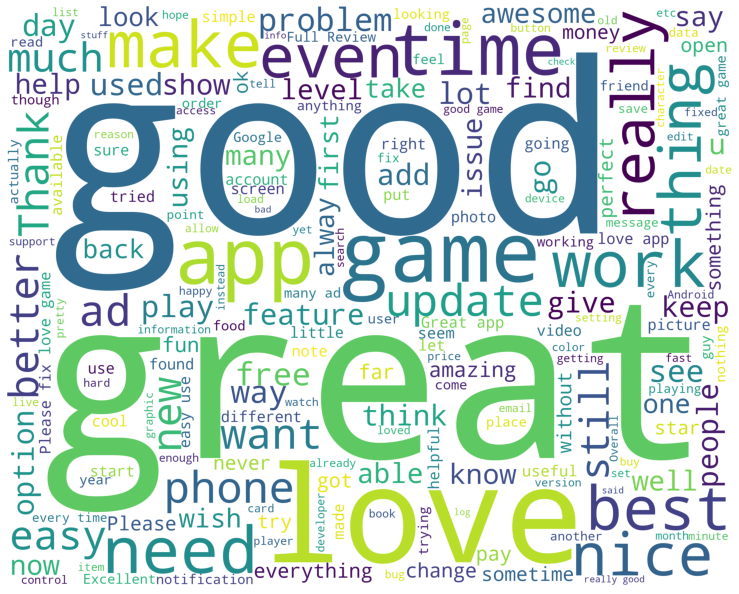

Negative words


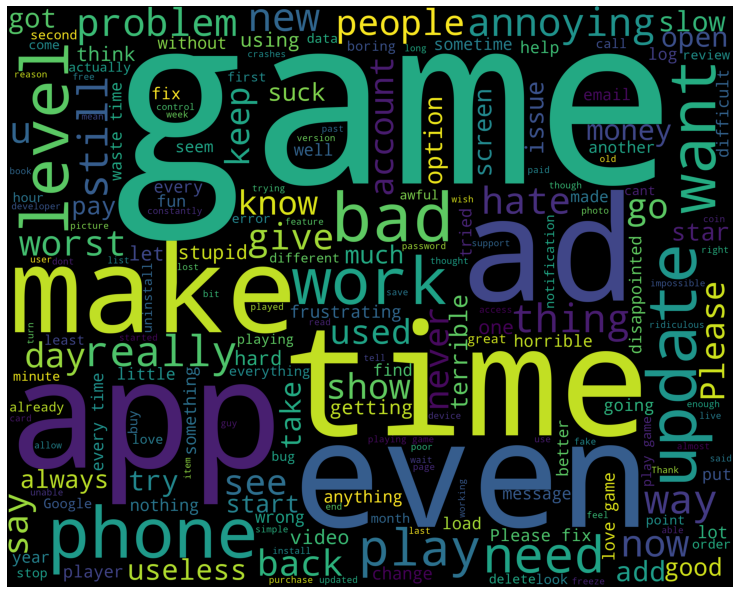

In [ ]:
train_pos = train[ train['Sentiment'] == 'Positive']
train_pos = train_pos['Translated_Review']
train_neg = train[ train['Sentiment'] == 'Negative']
train_neg = train_neg['Translated_Review']

def wordcloud_draw(data_1, color = 'black'):
    words = ' '.join(data_1)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
result = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Translated_Review.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    result.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 'Positive']
test_pos = test_pos['Translated_Review']
test_neg = test[ test['Sentiment'] == 'Negative']
test_neg = test_neg['Translated_Review']

In [ ]:
# Extracting word features
def get_words_in_result(result):
    all = []
    for (words, sentiment) in result:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_result(result))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

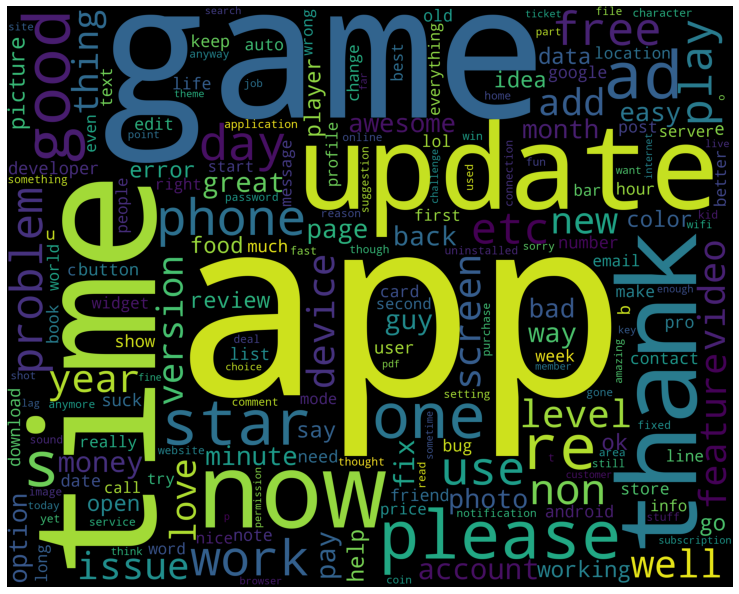

In [ ]:
wordcloud_draw(w_features)

In [ ]:
training_set = nltk.classify.apply_features(extract_features,result)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))   

[Negative]: 888/423 
[Positive]: 2372/2218 


In [ ]:
review_score

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb45eecc9d0>,
      dtype=object)

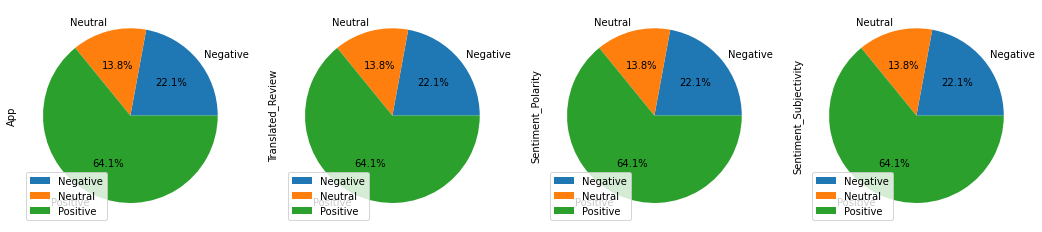

In [ ]:
data_1.groupby(['Sentiment']).count().plot(kind='pie', figsize=(18,8), autopct='%1.1f%%',subplots = True)